In [1]:
from csv import reader
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from scipy.stats import uniform, randint
import xgboost as xgb

features = ['년',
           '월', 
           '시', 
           '기온(°C)',
           '강수량(mm)', 
           '풍속(m/s)', 
           '습도(%)', 
           '적설(cm)',
           '요일_0', 
           '요일_1', 
           '요일_2', 
           '요일_3',
           '요일_4', 
           '요일_5', 
           '요일_6',]

location = 207
t = pd.read_pickle('data/pickle/data_10_20178.pkl')
t1 = pd.read_pickle('data/pickle/data_10_20178반납.pkl')
ts106 = t[t['대여장소'] == location]
x_trains, x_tests, y_trains, y_tests = train_test_split(ts106[features], ts106['빈도수'], test_size=0.2, random_state=15)

tr106 = t1[t1['반납장소'] == location]
x_trainr, x_testr, y_trainr, y_testr = train_test_split(tr106[features], tr106['빈도수'], test_size=0.2, random_state=15)

loaded_model = xgb.Booster()
loaded_modelr = xgb.Booster()

loaded_model.load_model("data/model/수요" + str(int(location)) + ".model")
loaded_modelr.load_model("data/model/공급" + str(int(location)) + ".model")

dtests = xgb.DMatrix(x_tests)
dtestr = xgb.DMatrix(x_testr)

predictions = loaded_model.predict(dtests)
predictionsr = loaded_modelr.predict(dtestr)

act = y_testr-y_tests
dif = predictionsr-predictions

mae = mean_absolute_error(act, dif)
print(mae)

3.22120003406019


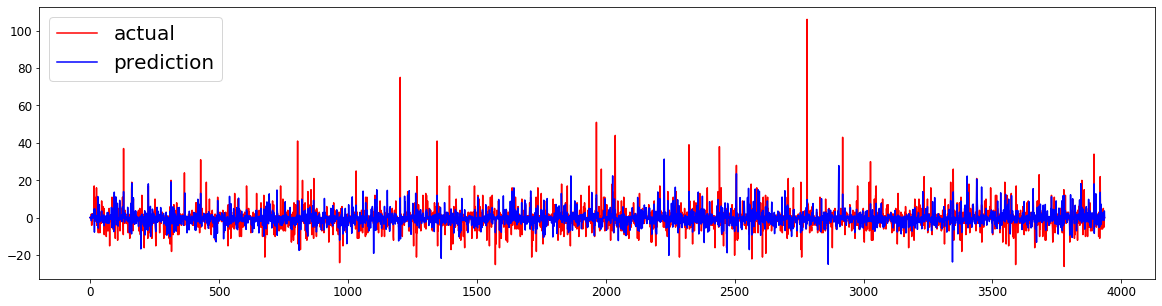

-0.12576219512195122


In [3]:
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline

font = {'size' : 12}

mpl.rc('font', **font)
#plt.title("Plot")
plt.figure(figsize=(20,5))


plt.plot(act.tolist(), color = "red",label='actual')
plt.plot(dif, color = "blue",label='prediction')
plt.legend(loc='upper left',fontsize = 20)

plt.show()

avg = sum(act.tolist())/len(act.tolist())
print(avg)